# Expectation and variance

Name: Arthur Pontes Nader

An important topic regarding random variables is their expectation, also known as the expected value, and their variance. The expectation provides the theoretical average value around which the samples of your distribution will vary. The variance, which is the square of the standard deviation, measures how much the values tend to deviate from the expectation.

## Libraries

In [3]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import math

from scipy.integrate import quad

np.set_printoptions(suppress=True)

## Expectation

### Expectation of discrete distribution

As we saw a little before studying some distributions, the expectation of discrete case is given by:


$$ \mathbb{E}[X] = \sum_{x_i}^{} x_i \cdot p(X = x_i) $$

In [4]:
n = 20
prob = 0.6
x = np.arange(0,50)

pmf = stats.binom.pmf(x, n, p=prob)

In [5]:
exp_x = x.dot(pmf)
exp_x

12.000000000000014

There are formulas that gives you directly the expectation for some distributions. In the case of binomial, is just n\*p

In [6]:
n*prob

12.0

### Expectation of continuous distribution

In the continuous case, you have to calculate the expectation integrating over the pdf:

$$ \mathbb{E}[X] = \int_{-\infty}^{\infty} x \cdot f(x) \, dx $$

Let's try for a exponential distribution:

In [ ]:
lambda_ = 0.5

We already know that the expected value is 1/lambda.

In [98]:
exp = 1/lambda_
exp

2.0

In [101]:
def exponential_pdf(x, lambda_):
    return lambda_ * np.exp(-lambda_ * x)

def integrand(x, lambda_):
    return x * exponential_pdf(x, lambda_)

expected_value, _ = quad(integrand, 0, np.inf, args=(lambda_,))

print(f"Expected value: {expected_value}")

Expected value: 1.9999999999999998


### Properties of expectation

Let Y be a random variable in such a way that Y = a + bX, where a and b are constants and X is another random variable. So:

$$ \mathbb{E}[Y] = a + b \cdot \mathbb{E}[X] $$

In [7]:
y = 2*x + 5

exp_y = y.dot(pmf)
exp_y

29.000000000000032

In [8]:
2*exp_x + 5

29.00000000000003

If a = -E[X] = -μ and b = 1, we say that Y is a random variable centered (in its expectation)

In [9]:
y = x - exp_x

exp_y = y.dot(pmf)
exp_y # almost zero

-1.3222116544003848e-14

Let X and Y two random variables. The following property is valid:

$$ \mathbb{E}[X + Y] = \mathbb{E}[X] + \mathbb{E}[Y] $$

In [18]:
n = 20
prob = 0.6
x = np.arange(0,25)

pmf_x = stats.binom.pmf(x, n, p=prob)

In [19]:
exp_x = n*prob

In [20]:
lambda_ = 10
y = np.arange(0, 25)

pmf_y = stats.poisson.pmf(y, lambda_)

In [21]:
exp_y = lambda_

In [22]:
exp_x + exp_y

22.0

$$ \mathbb{E}(X + Y) = \sum_{i} \sum_{j} (x_i + y_j) P(X = x_i, Y = y_j) $$

In [23]:
exp_x_y = 0
for i in range(len(pmf_x)):
    for j in range(len(pmf_y)): 
        exp_x_y += (x[i]+y[j])*(pmf_x[i]*pmf_y[j])

In [24]:
exp_x_y ## it is an approximation

21.998235385883465

Let's visualize it in two different ways. First, by a joint probability grid

In [43]:
X, Y = np.meshgrid(x, y)
Z = X + Y

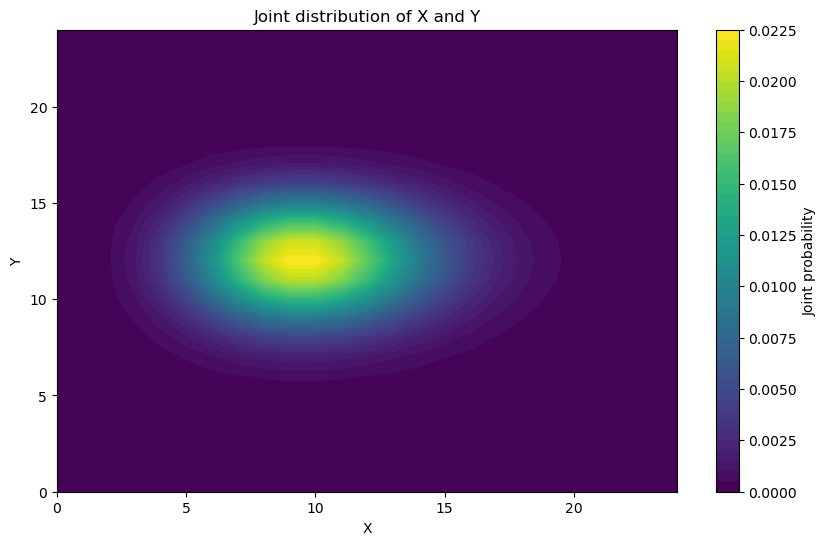

In [44]:
pmf_xy = np.outer(pmf_x, pmf_y)

plt.figure(figsize=(10, 6))
plt.contourf(X, Y, pmf_xy, levels=50, cmap='viridis')
plt.colorbar(label='Joint probability')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Joint distribution of X and Y')

plt.show()

You can notice that the brighter region is where X + Y is around 22.

Now, let's generate samples of the two distributions, sum them and visualize the resulting histogram:

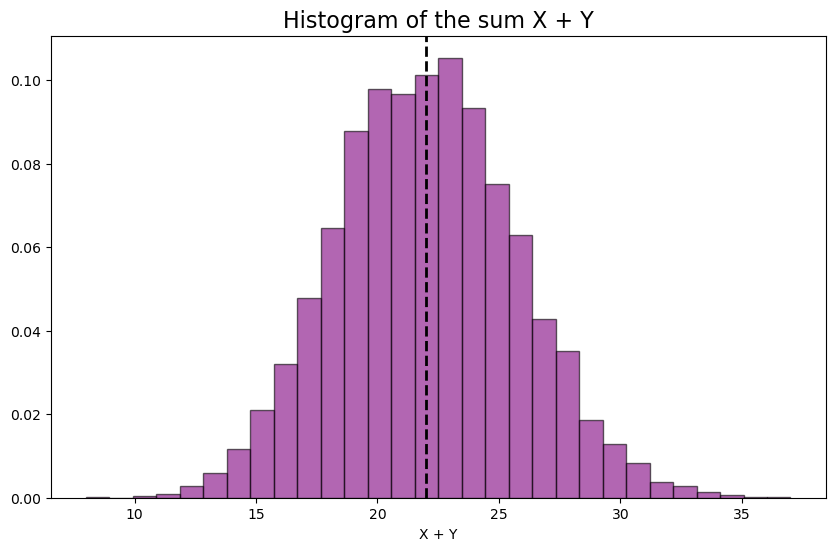

In [88]:
num_samples = 10000
samples_x = stats.binom.rvs(20, 0.6, size=num_samples)
samples_y = stats.poisson.rvs(10, size=num_samples)

samples_sum = samples_x + samples_y

plt.figure(figsize=(10, 6))
plt.hist(samples_sum, bins=30, density=True, alpha=0.6, color='purple',edgecolor='black')
plt.axvline(x=22, color='black', linestyle='--', linewidth=2)
plt.title('Histogram of the sum X + Y', fontsize = 16)
plt.xlabel('X + Y')
plt.show()

It appears to actually be centered around 22

Let X and Y two independent random variables. The following property is valid:

$$ \mathbb{E}[X \cdot Y] = \mathbb{E}[X] \cdot \mathbb{E}[Y] $$

In [69]:
exp_x*exp_y

120.0

$$ \mathbb{E}(X \cdot Y) = \sum_{i} \sum_{j} (x_i \cdot y_j) P(X = x_i, Y = y_j) $$

In [76]:
exp_x_y_2 = 0
for i in range(len(pmf_x)):
    for j in range(len(pmf_y)): 
        exp_x_y_2 += x[i]*y[j]*pmf_x[i]*pmf_y[j]

In [77]:
exp_x_y_2 ## remember, it is an approximation

119.98558534152636

Think a little about the multiplication of X and Y in the grid where the probability is higher and compare it with the value above. Let's see new histogram:

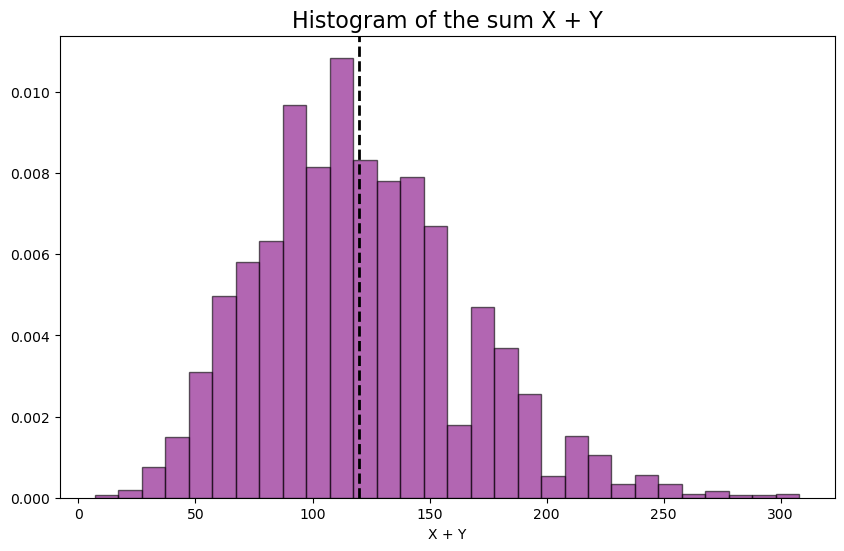

In [91]:
num_samples = 10000
samples_x = stats.binom.rvs(20, 0.6, size=num_samples)
samples_y = stats.poisson.rvs(10, size=num_samples)

samples_sum = samples_x * samples_y

plt.figure(figsize=(10, 6))
plt.hist(samples_sum, bins=30, density=True, alpha=0.6, color='purple',edgecolor='black')
plt.axvline(x=120, color='black', linestyle='--', linewidth=2)
plt.title('Histogram of the sum X + Y', fontsize = 16)
plt.xlabel('X + Y')
plt.show()

## Variance

Remember, we want to measure the variation of a random variable around its expectation, μ.

X−μ is sometimes positive and sometimes negative. We are more interested in the magnitude of the deviation, not its sign.

What about ∣X−μ∣? It's a random variable, so it has a distribution. We want a unique number to represent the entire distribution

And if we take E[∣X−μ∣]? We are getting close, but calculations involving absolute values are a bit complicated. Think about it: what is the derivative of ∣x∣ at the minimum of the function?


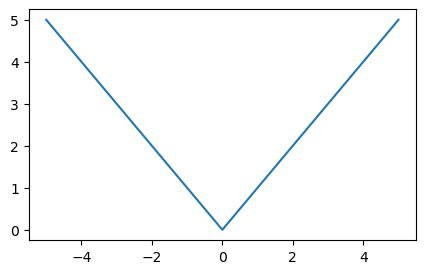

In [12]:
x = np.arange(-5,6)
y = abs(x)

plt.figure(figsize=(5,3))
plt.plot(x,y)
plt.show()

Instead, we often consider the squared deviation, (X−μ)^2, which is always non-negative and gives more weight to larger deviations. The expected value of the squared deviation, E[(X−μ)^2], is called the variance, denoted by Var(X) or σ^2. The square root of the variance is the standard deviation, σ, which provides a measure of the average distance of the random variable from its mean.

Therefore, by examining the variance or standard deviation, we can quantify the spread or dispersion of the random variable around its mean.

### Variance of discrete distribution

Remember $$E(g(X) = \sum_{i} g(x_i) P(X = x_i)$$

Let $$g(X) = (X − μ)^2$$So:

$$ V(X) = E((X − μ)^2) = \sum_{i} (x_i − μ)^2 P(X = x_i)$$


In [17]:
n = 25
prob = 0.4
x = np.arange(0,50)

pmf = stats.binom.pmf(x, n, p=prob)

In [18]:
exp_val = n*prob
exp_val

10.0

In [19]:
variance = ((x-exp_val)**2).dot(pmf)
variance

6.000000000000006

### Another way to calculate variance:

$$ V(X) = E[X²] - (E[X])² $$

In [33]:
variance = (x**2).dot(pmf) - exp_val**2
variance

6.000000000000128

### Variance of continuous distribution

$$ V(X) = E((X − μ)^2) = \int (x − μ)^2 f(x) \, dx $$

In [23]:
lambda_ = 3

In [25]:
def exponential_pdf(x, lambda_):
    return lambda_ * np.exp(-lambda_ * x)

def integrand(x, lambda_):
    return x * exponential_pdf(x, lambda_)

expected_value, _ = quad(integrand, 0, np.inf, args=(lambda_,))

print(f"Expected value: {expected_value}")

Expected value: 0.33333333333333326


In [27]:
def integrand_2(x, expected_value, lambda_):
    return ((x-expected_value)**2) * exponential_pdf(x, lambda_)

variance, _ = quad(integrand_2, 0, np.inf, args=(expected_value, lambda_))

print(f"Variance: {variance}")

Variance: 0.11111111111111108


### Properties of the variance


$$ V(a + X ) = V(X) $$

Think a little, if we shift all values of X 5 units, we will also shift the expectation by 5 units

In [40]:
n = 25
prob = 0.4
x = np.arange(0, 50)

pmf = stats.binom.pmf(x, n, prob)
exp_val = n * prob
variance_original = ((x - exp_val)**2).dot(pmf)

print(f"Original Variance: {variance_original}")

Original Variance: 6.000000000000006


In [39]:
shifted_x = x + 5
exp_val_shifted = exp_val + 5

variance_shifted = ((shifted_x - exp_val_shifted)**2).dot(pmf)

print(f"Shifted Variance: {variance_shifted}")

Shifted Variance: 6.000000000000006


$$ V(bX) = b²V(X) $$

In [44]:
(5**2)*variance_original ## right side of the formula

150.00000000000014

In [61]:
new_x = 5*x
new_exp_val = 5*exp_val

new_variance = ((new_x - new_exp_val)**2).dot(pmf)

print(f"New Variance: {new_variance}")

New Variance: 150.00000000000017


Let X and Y two independent random variables. So:

$$ V(X + Y) = V(X) + V(Y) $$

Now, let's verify it (this is an experiment, not a proof) using samples of two different distributions

In [95]:
num_samples = 200000
samples_x = stats.binom.rvs(20, 0.6, size=num_samples)
samples_y = stats.poisson.rvs(10, size=num_samples)

samples_sum = samples_x + samples_y

In [96]:
np.var(samples_x) + np.var(samples_y)

14.789836080874998

In [97]:
np.var(samples_sum)

14.771589278775002

If X and Y are not independent, we will need to introduce the correlation between X and Y in the formula. This topic will be covered in a future notebook.